# Pandas 

## Success Criteria
Today I will be successful if I can ...

* Create `Series` and `DataFrame` using
    * Lists
    * Numpy arrays
    * CSV files
* Use the various methods of a pandas `DataFrame`
* Create new columns in `DataFrame`
* Index and Slice `pandas` objects
* Aggregate data in `DataFrame`s.
* Join multiple `DataFrame`s.


## What is Pandas?
A Python library providing data structures and data analysis tools. The name comes from "panel data"; think about it as a way to visualize and sift through tables of data, similar to R or (heaven forfend) Excel.

* They are built on top of NumPy NdArrays
* http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html



## Benefits

* Efficient storage and processing of data.
* Includes many built in functions for data transformation, aggregations, and plotting.
* Great for exploratory work.

## Not so greats

* Does not scale terribly well to large datasets.

## Documentation:

* http://pandas.pydata.org/pandas-docs/stable/index.html

In [ ]:
#By convention import pandas like:
import pandas as pd
#By convention import numpy like:
import numpy as np
#Make sure you have both lines when using matplotlib in Jupyter notebook
import matplotlib.pyplot as plt
#For fake data.
from numpy.random import randn
np.random.seed(123)

#for stylistic reasons:
%matplotlib inline
plt.style.use('ggplot')

# Pandas is built on Numpy
* Numpy is one of the fundamental packages for scientific computing in Python.


## Numpy Arrays
* Or NdArrays (n-dimensional array)
* They are like lists in Python however they allow faster computation
    1. They are stored as one contiguous block of memory, rather than being spread out across multiple locations like a list. 
    2. Each item in a numpy array is of the same data type (i.e. all integers, all floats, etc.), rather than a conglomerate of any number of data types (as a list is). We call this idea homogeneity, as opposed to the possible heterogeneity of Python lists.


Lets do a quick review


In [ ]:
# Create a 1 dimensional numpy array with values 1 through 20


In [ ]:
# Extract all odd numbers from array above


In [ ]:
# Replace all odd numbers in array above with value "-1" and save this to a new array varibale
# without replacing any values in the original array


In [ ]:
# Convert a 1D array to a 2D array with 2 rows (you can use array above or a new array)


In [ ]:
#Get all of the items between 5 and 10 from the array below

a = np.array([2,6,1,9,10,3,27])


In [ ]:
#Reverse the columns of the 2D array shown below

b = np.arange(9).reshape(3,3)


In [ ]:
#create a 2D array of shape 5x3 to contain random decimal values between 5 and 10


----------------------------------------------------

# Pandas Series
* are (one dimensional) np.ndarray vectors **with an index**
* They are built upon NdArrays

In [ ]:
series = pd.Series([5775,373,7,42,np.nan,33.9])
print("series is \n{}\n".format(series))
print("the shape of the series is {}".format(series.shape))

In [ ]:
world_series = pd.Series(["cubs","royals","giants","sox","giants","cards","giants","...",None])
world_series

## Pandas Series are very powerful when dealing with dates

In [ ]:
# pd.date_range?

In [ ]:
#Datetime index
dt_index = pd.date_range('2015-1-1', '2015-11-1', freq='m')

np.random.seed(999)
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

## Series methods

In [ ]:
round(dt_series.mean(), 2)

# Index
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [ ]:
np.random.seed(999)

indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print("indexed_series = \n{}\n".format(indexed_series))
print("alt_indexed_series = \n{}".format(alt_indexed_series))

In [ ]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

# Pandas `DataFrame`s
* are a set of Pandas Series **that share the same index** 


In [ ]:
pd.DataFrame(
    [[1, 2, 3], [4, 5, 6]], 
    columns=['a', 'b', 'c'], 
    index=['foo', 'bar'])

In [ ]:
#made up column names ... no real purpose here
# cols = ['vals', 'amount', 'rank', 'random', 'terms']

np.random.seed(888)
df = pd.DataFrame(randn(10, 5), 
                  index=dt_index,
                  columns=[x for x in 'abcde'])
df

## To select just one column, use brackets


In [ ]:
df['a']

You can also use the "dot notation" for selecting a column

In [ ]:
df.a

Note that this will fail if your column has the same name as a dataframe method, so you may wish to avoid this notation.

In [ ]:
#made up column names ... no real purpose here
cols = ['vals', 'amount', 'rank', 'random', 'terms']

np.random.seed(888)
df2 = pd.DataFrame(randn(10, 5), 
                  index=dt_index,
                  columns=[x for x in cols])
df2.head(3)

In [ ]:
df2['rank']

In [ ]:
df2.rank

## To select one row, use .loc[]

In [ ]:
df.loc['2015-10-31']

## A column of a dataframe is a series:

In [ ]:
col = df['d']
type(col)

## So is a row

In [ ]:
row = df.loc['2015-01-31']
type(row)

### The columns all have the same index:

In [ ]:
col.index   

### What's the index for the rows?

In [ ]:
row.index

In [ ]:
df.index

In [ ]:
df.columns

## Selecting multiple columns

In [ ]:
df[['a','e']]
#note the double brackets

## Column operations
Just like numpy, operations are broadcast to every element of a column

In [ ]:
df['a'] + df['b']

## Adding a new column
It's just like setting by key in a dictionary

In [ ]:
df['f'] = abs(df['a'])**df['b']

In [ ]:
df

## Advanced selection


### .loc 
select by row label (index), and column label

In [ ]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

In [ ]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] = 2.7

In [ ]:
df

### .iloc
select by __positional__ index

In [ ]:
df.iloc[2:4,2:5] #Ranges by number.


      
# Multiple Indices

Start with a df with a single date index

In [ ]:
np.random.seed(777)
dt_index = pd.date_range('2015-1-1', '2017-7-1', freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)
df

Let's add new column of states

In [ ]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

`reset_index` shifts the index to a column, then gives the rows a boring old positional index

In [ ]:
df = df.reset_index()

In [ ]:
df

`set_index` sets columns to indices

In [ ]:
df = df.set_index(['state', 'index'])
df.head()

In [ ]:
df.loc['Alabama']

In [ ]:
# df.loc['2015-01-31'] #Doesn't work.


In [ ]:
df.loc[('Alabama', '2015-01-31')] #Can do this. (use both first and second index)

# Loading data from a file

In [ ]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [ ]:
df.head()  #Display the first x rows (default is 5)

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.tail()

# Filtering (i.e., row selecting or boolean indexing)

In [ ]:
df['chlorides']

In [ ]:
df['chlorides'] <= 0.08 

In [ ]:
mask = df['chlorides'] <= 0.08 

In [ ]:
mask

In [ ]:
type(mask)

You can use a boolean series to "mask" a dataframe / series, returning only those rows where the mask is `True`

In [ ]:
df[mask]

In [ ]:
# Okay, this is cool. What if I wanted a slightly more complicated query...
df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)]

In [ ]:
df2 = df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)][['pH','fixed acidity']]

In [ ]:
df2.head()

In [ ]:
df2.sort_values('pH').reset_index().head()

In [ ]:
df2.sort_values('pH').reset_index(drop=True).head()

# Groupby

In [ ]:
df.head()

In [ ]:
g = df.groupby('quality') # Note that this returns back to us a groupby object. It doesn't actually 
                      # return to us anything useful until we perform some aggregation on it. 
g

In [ ]:
g.max()

In [ ]:
g.max()['density']

In [ ]:
# Note we can also group by multilple columns by passing them in in a list. It will group by 
# the first column passed in first, and then the second after that (i.e., it will group by 
# the second within the group by of the first). 
df2 = df.groupby(['pH', 'quality']).count()

df2.head(20)

# Remove columns

In [ ]:
# add a computed column name it something new

df['free sulfur dioxide'] / df['total sulfur dioxide']

In [ ]:
df['pct_free_sulf'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

In [ ]:
df.head()

In [ ]:
# Dropping a row
df.drop(0, axis = 0, inplace = False)

In [ ]:
# df.drop('pct_free_sulf')

In [ ]:
df.drop('pct_free_sulf', axis = 1).head()

In [ ]:
df.columns

# Managing Missing Values
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [ ]:
miss_val_df = pd.DataFrame(
    [[1, 2, 3], [4, np.nan, 6]], 
    columns=['a', 'b', 'c'], 
    index=['foo', 'bar'])
miss_val_df

In [ ]:
miss_val_df.fillna(0)

In [ ]:
miss_val_df

In [ ]:
# IF YOU WANT THE CHANGE TO HAPPEN INPLACE YOU MUST SPECIFY:
miss_val_df.fillna(0,inplace=True)
miss_val_df

In [ ]:
miss_val_df['b']['foo'] = np.nan

In [ ]:
miss_val_df

In [ ]:
miss_val_df.dropna(axis = 1)

In [ ]:
miss_val_df.dropna(axis = 0)

# Merge 
* http://pandas.pydata.org/pandas-docs/stable/merging.html

We can join DataFrames in a similar way that we join tables to SQL.  In fact, left, right, outer, and inner joins work the same way here.



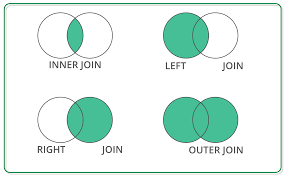

In [ ]:
merge1 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['a', 'b', 'c'])

merge2 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['z', 'b', 'y'])

print("merge1 = \n{}\n\nmerge2=\n{}\n".format(merge1, merge2))

In [ ]:
merged_df = merge1.merge(merge2, how='outer')

In [ ]:
merged_df

# Concatenating
* adding *rows*
* see also: df.append()

In [ ]:
df1 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col3': range(5)})
df2 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col4': range(5)},
    index=range(5, 10))

In [ ]:
df1

In [ ]:
df2

In [ ]:
#Vertically
pd.concat([df1, df2], axis=0, sort=False)

In [ ]:
pd.concat([df1, df2], join='outer', axis=1)

# Categorical data

In [ ]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

df.value_counts() gets you the frequencies

In [ ]:
df['Outlook'].value_counts()

Using apply will get you the value counts for multiple columns at once

In [ ]:
df[['Outlook','Result']].head(2)

In [ ]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

Contingency Tables for looking at bivariate relationships between two categorical variables

In [ ]:
pd.crosstab(df['Outlook'], df['Result'])

Often we want the row percentages

In [ ]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Or the column percentages

In [ ]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

# Plotting DataFrames

In [ ]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

In [ ]:
df.hist(['Temperature','Humidity'],bins=5);

In [ ]:
df[['Temperature','Humidity']].plot(kind='box');

In [ ]:
df.plot('Temperature', 'Humidity', kind='scatter');

In [ ]:
groups=df.groupby('Outlook')
print(groups)
for stuff in groups:
    print(stuff)

In [ ]:
for name, group in groups:
    print(type(group))

In [ ]:
for name, group in groups:
    print(name)

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity,\
            marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

In [ ]:
df.head()

In [ ]:
df['Outlook'].value_counts()

In [ ]:
df['Windy'].value_counts()

In [ ]:
g = df.groupby(['Outlook', 'Windy'])

In [ ]:
g.max()

In [ ]:
g.agg(max) 


In [ ]:
df_th = g.agg(max)[['Temperature','Humidity']]
df_th

In [ ]:
df_th.unstack()

In [ ]:
df_th.unstack()['Temperature']

In [ ]:
df_th.reset_index()

In [ ]:
df